# Exploratory Data Analysis - House Price Dataset
## Introduction
This notebook presents an **exploratory data analysis (EDA)** of a residential housing dataset from Kaggle, as part of a personal machine learning project. The goal of this analysis is to identify key factors that influence house prices and to prepare the dataset for further predictive modeling.

**Dataset:** Housing Price Prediction Data (Kaggle)

**Objective:** Understanding what affects house prices and prepare for modeling

**Author:** NGUYEN Ngoc Dang Nguyen - Final-year Student in Computer Science of Aix-Marseille University

# 1. Load Librabies and Data

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for prettier plots
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Load the data
df = pd.read_csv("housing_price_dataset.csv")
df.columns = df.columns.str.strip()

print(f"Dataset loaded: {df.shape[0]} rows and {df.shape[1]} columns")
df.head()


Dataset loaded: 50000 rows and 6 columns


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


# 2. Dataset Overview

In [28]:
print("Dataset Overview")
print("=" * 40)
print(f"Number of houses: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print(f"Dataset size: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")

print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\nData types:")
print(df.dtypes)

# Basic statistics
print("\nQuick statistics:")
df.describe()


Dataset Overview
Number of houses: 50000
Number of features: 6
Dataset size: 4996.9 KB

Column names:
 1. SquareFeet
 2. Bedrooms
 3. Bathrooms
 4. Neighborhood
 5. YearBuilt
 6. Price

Data types:
SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

Quick statistics:


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


# 3. Missing Values Analysis

In [40]:
print("Checking for missing values...")

missing = df.isnull().sum()
if missing.sum() > 0:
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing Count': missing.values,
        'Percentage': (missing.values / len(df) * 100).round(1)
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

    print(f"Found {len(missing_df)} columns with missing values:")
    print(missing_df.to_string(index=False))

    # Simple visualization
    plt.figure(figsize=(10, 4))
    sns.barplot(data=missing_df, x='Percentage', y='Column')
    plt.title('Missing Values by Column')
    plt.xlabel('Percentage Missing (%)')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

Checking for missing values...
No missing values found in the dataset!


# 4. Target Variable Analysis

🎯 Analyzing target variable: Price
Average price: 224827.33
Median price: 225052.14
Price range: -36588.17 to 492195.26
Standard deviation: 76141.84


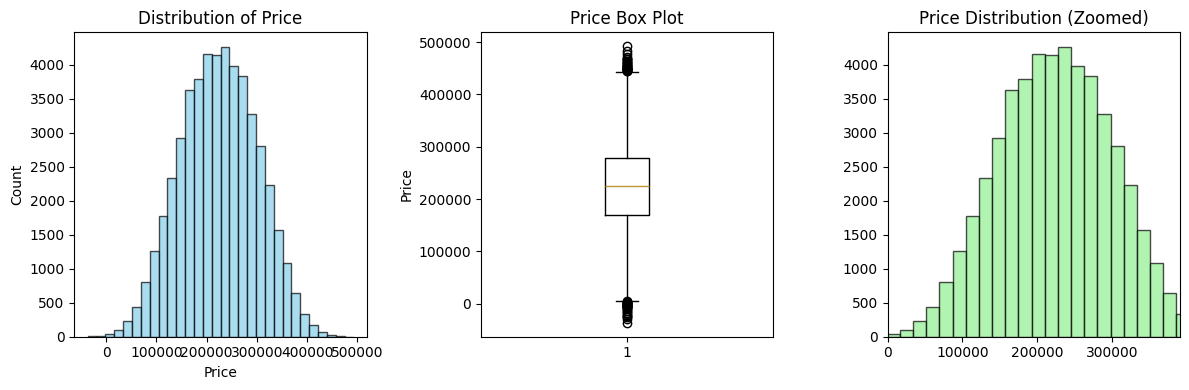

In [51]:
# Find the price column - could be 'price', 'price_per_m2', etc.
price_cols = [col for col in df.columns if 'price' in col.lower()]
if not price_cols:
    # Try other common names
    price_cols = [col for col in df.columns if col.lower() in ['cost', 'value', 'amount']]

if price_cols:
    price_col = price_cols[0]  # Use first price column found
else:
    # Use first numeric column as fallback
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    price_col = numeric_cols[0]

print(f"🎯 Analyzing target variable: {price_col}")
print("=" * 40)

# Basic stats
print(f"Average price: {df[price_col].mean():.2f}")
print(f"Median price: {df[price_col].median():.2f}")
print(f"Price range: {df[price_col].min():.2f} to {df[price_col].max():.2f}")
print(f"Standard deviation: {df[price_col].std():.2f}")

# Visualize price distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df[price_col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {price_col}')
plt.xlabel(price_col)
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.boxplot(df[price_col])
plt.title('Price Box Plot')
plt.ylabel(price_col)

plt.subplot(1, 3, 3)
plt.hist(df[price_col], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Price Distribution (Zoomed)')
# Remove extreme outliers for better view
q99 = df[price_col].quantile(0.99)
plt.xlim(0, q99)

plt.tight_layout()
plt.show()

# 5. Categorical Variables Analysis

🏷️ Categorical Features Analysis

📊 Neighborhood:
  • 3 unique values
  • Most common: Suburb (16721 times)


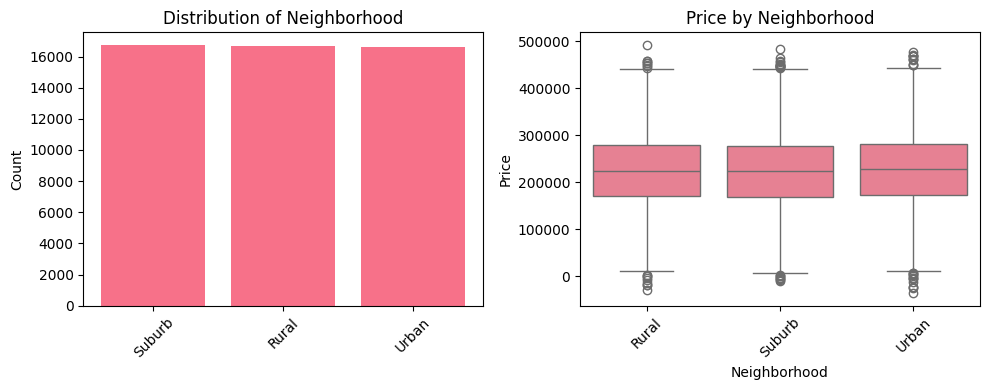

In [52]:
# Find categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if categorical_cols:
    print("🏷️ Categorical Features Analysis")
    print("=" * 40)

    for col in categorical_cols[:4]:  # Analyze first 4 categorical columns
        print(f"\n📊 {col}:")
        value_counts = df[col].value_counts()
        print(f"  • {df[col].nunique()} unique values")
        print(f"  • Most common: {value_counts.index[0]} ({value_counts.iloc[0]} times)")

        # Show distribution
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        top_values = value_counts.head(8)  # Show top 8 categories
        plt.bar(range(len(top_values)), top_values.values)
        plt.xticks(range(len(top_values)), top_values.index, rotation=45)
        plt.title(f'Distribution of {col}')
        plt.ylabel('Count')

        # Box plot if not too many categories
        if df[col].nunique() <= 10:
            plt.subplot(1, 2, 2)
            sns.boxplot(x=col, y=price_col, data=df)
            plt.title(f'{price_col} by {col}')
            plt.xticks(rotation=45)
        else:
            plt.subplot(1, 2, 2)
            plt.text(0.5, 0.5, f'Too many categories\n({df[col].nunique()} unique values)',
                     ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
            plt.title('Too many categories for box plot')

        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns found.")

# 6. Numerical Variables Analysis

🔢 Numerical Features Analysis
Found 4 numerical features:
['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']

📊 Statistics for numerical features:
       SquareFeet  Bedrooms  Bathrooms  YearBuilt
count    50000.00  50000.00   50000.00   50000.00
mean      2006.37      3.50       2.00    1985.40
std        575.51      1.12       0.82      20.72
min       1000.00      2.00       1.00    1950.00
25%       1513.00      3.00       1.00    1967.00
50%       2007.00      3.00       2.00    1985.00
75%       2506.00      4.00       3.00    2003.00
max       2999.00      5.00       3.00    2021.00


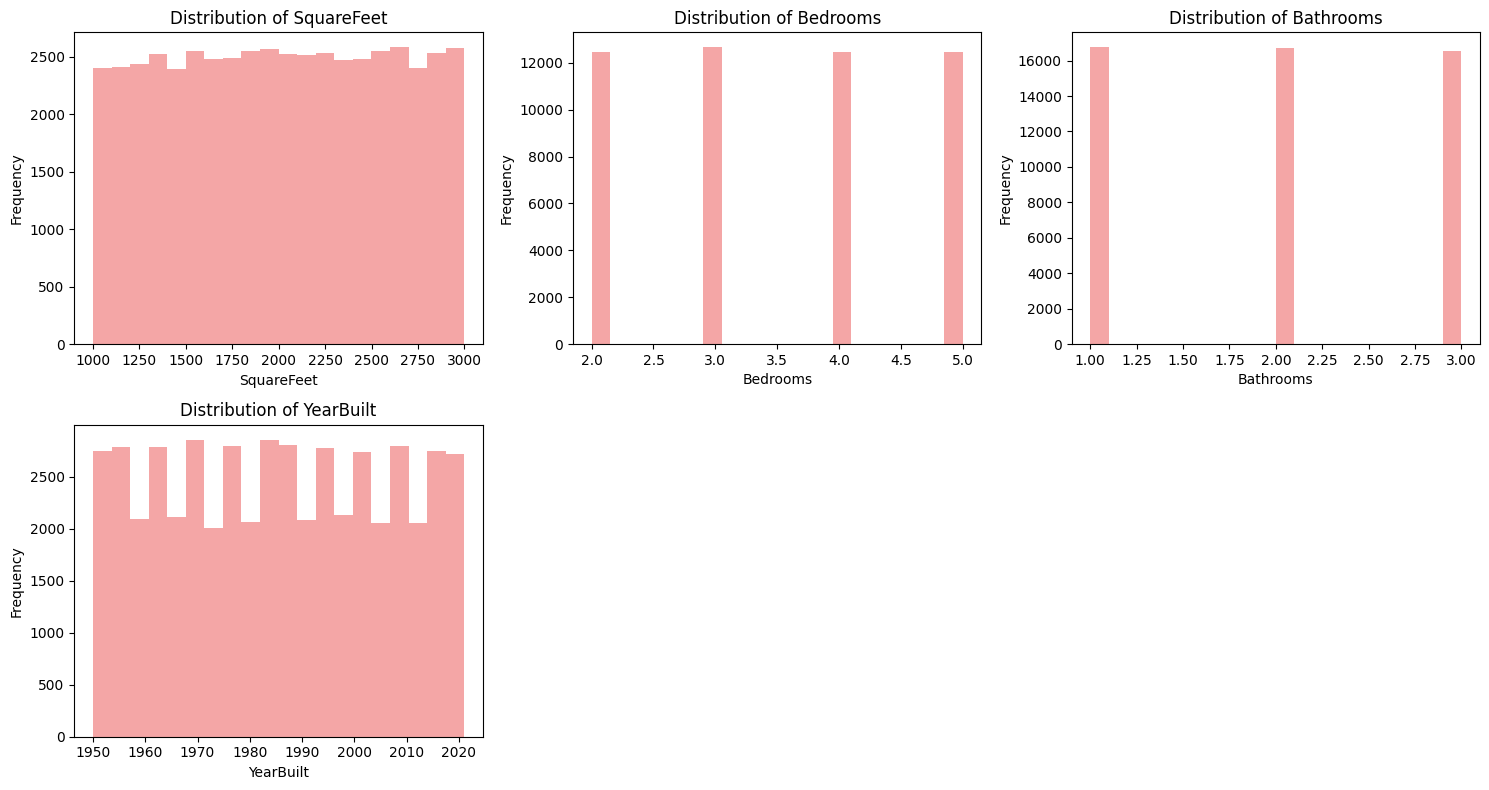

In [53]:
# Find numerical columns (excluding our target)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if price_col in numeric_cols:
    numeric_cols.remove(price_col)

print(f"🔢 Numerical Features Analysis")
print("=" * 40)
print(f"Found {len(numeric_cols)} numerical features:")
print(numeric_cols)

if numeric_cols:
    # Show basic stats
    print(f"\n📊 Statistics for numerical features:")
    print(df[numeric_cols].describe().round(2))

    # Plot distributions
    n_features = min(6, len(numeric_cols))  # Show max 6 features
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols[:n_features]):
        axes[i].hist(df[col].dropna(), bins=20, alpha=0.7, color='lightcoral')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hide empty plots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# 7. Relationships Between Features

🔗 Feature Relationships
Features most related to Price:
  • SquareFeet: 0.751
  • Bedrooms: 0.073
  • Bathrooms: 0.028
  • YearBuilt: 0.002


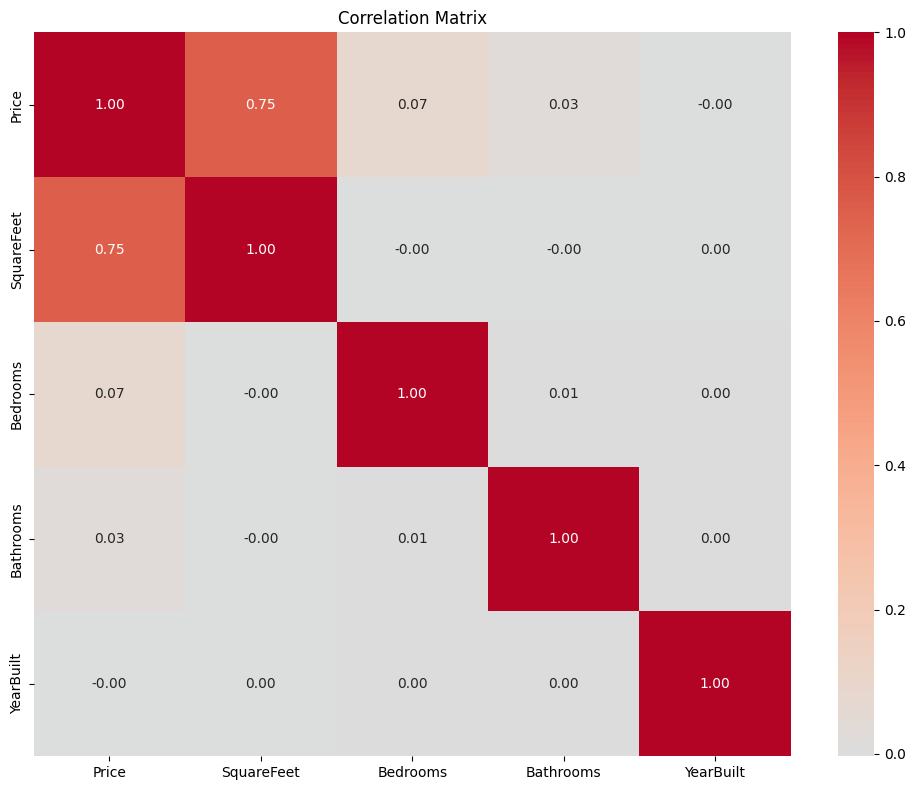

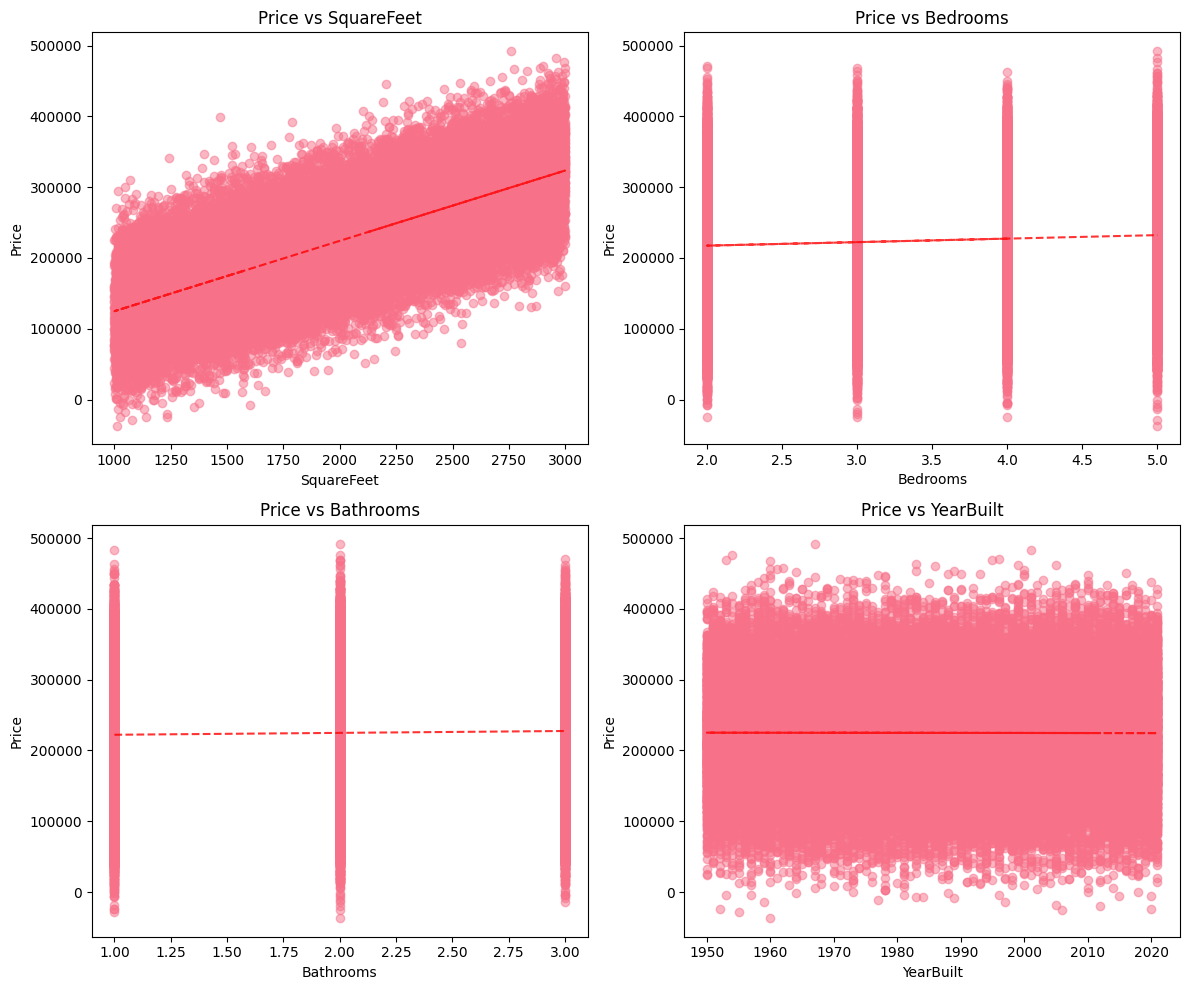

In [54]:
print("🔗 Feature Relationships")
print("=" * 40)

# Calculate correlations for numerical features
numeric_for_corr = [price_col] + numeric_cols
if len(numeric_for_corr) > 1:
    correlation_matrix = df[numeric_for_corr].corr()

    # Show correlations with price
    price_correlations = correlation_matrix[price_col].drop(price_col).abs().sort_values(ascending=False)

    print(f"Features most related to {price_col}:")
    for feature, corr in price_correlations.head(5).items():
        print(f"  • {feature}: {corr:.3f}")

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

    # Scatter plots of top correlated features
    top_features = price_correlations.head(4).index.tolist()
    if top_features:
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.flatten()

        for i, feature in enumerate(top_features):
            axes[i].scatter(df[feature], df[price_col], alpha=0.5)
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel(price_col)
            axes[i].set_title(f'{price_col} vs {feature}')

            # Add simple trend line
            z = np.polyfit(df[feature].dropna(), df[price_col].dropna(), 1)
            p = np.poly1d(z)
            axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8)

        plt.tight_layout()
        plt.show()

# 8. Looking for Outliers

🔍 Outlier Detection
Found 59 potential outliers in Price
That's 0.1% of the data
Outlier price range: -36588.17 to 492195.26
Normal price range: 5829.21 to 443500.28


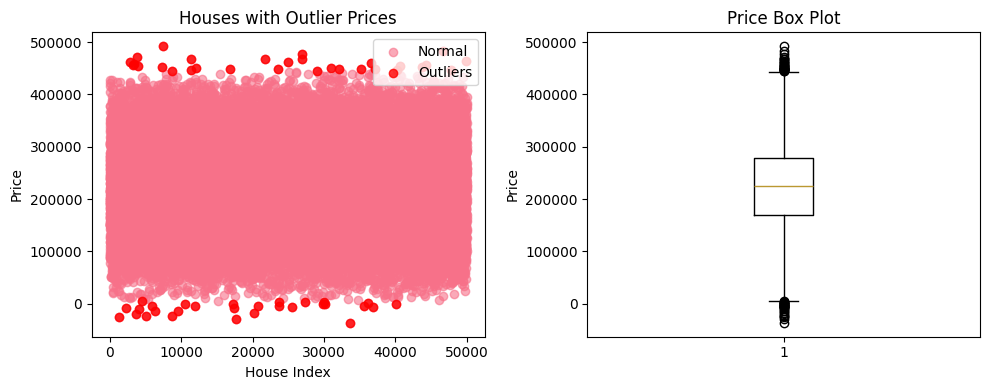

In [55]:
print("🔍 Outlier Detection")
print("=" * 40)

# Simple outlier detection using IQR method on price
Q1 = df[price_col].quantile(0.25)
Q3 = df[price_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[price_col] < lower_bound) | (df[price_col] > upper_bound)]
print(f"Found {len(outliers)} potential outliers in {price_col}")
print(f"That's {len(outliers)/len(df)*100:.1f}% of the data")

if len(outliers) > 0:
    print(f"Outlier price range: {outliers[price_col].min():.2f} to {outliers[price_col].max():.2f}")
    print(f"Normal price range: {lower_bound:.2f} to {upper_bound:.2f}")

# Visualize outliers
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df[price_col], alpha=0.6, label='Normal')
outlier_indices = df[(df[price_col] < lower_bound) | (df[price_col] > upper_bound)].index
plt.scatter(outlier_indices, df.loc[outlier_indices, price_col], color='red', alpha=0.8, label='Outliers')
plt.xlabel('House Index')
plt.ylabel(price_col)
plt.title('Houses with Outlier Prices')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(df[price_col])
plt.title(f'{price_col} Box Plot')
plt.ylabel(price_col)

plt.tight_layout()
plt.show()

# 9. Exploratory conclusion
This exploratory analysis highlights significant variations in house prices according to housing type, number of rooms, and geographic location. These findings will guide feature selection and influence the choice of modeling techniques in the subsequent stages of the project.